__Sadaf Sadeghian  810195419__

# Self-Driving Car Engineer Nanodegree


##  Finding Lane Lines on the Road

***
In this project, objective is to inhance the lane line detection of previous phase of project.In order to do this we have some steps forward including:
* Disstortion Correction
*
*
*
*
***

# Importing Packages

In [52]:
#importing some useful packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import glob
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# Distortion Correction

## Camera Calibration

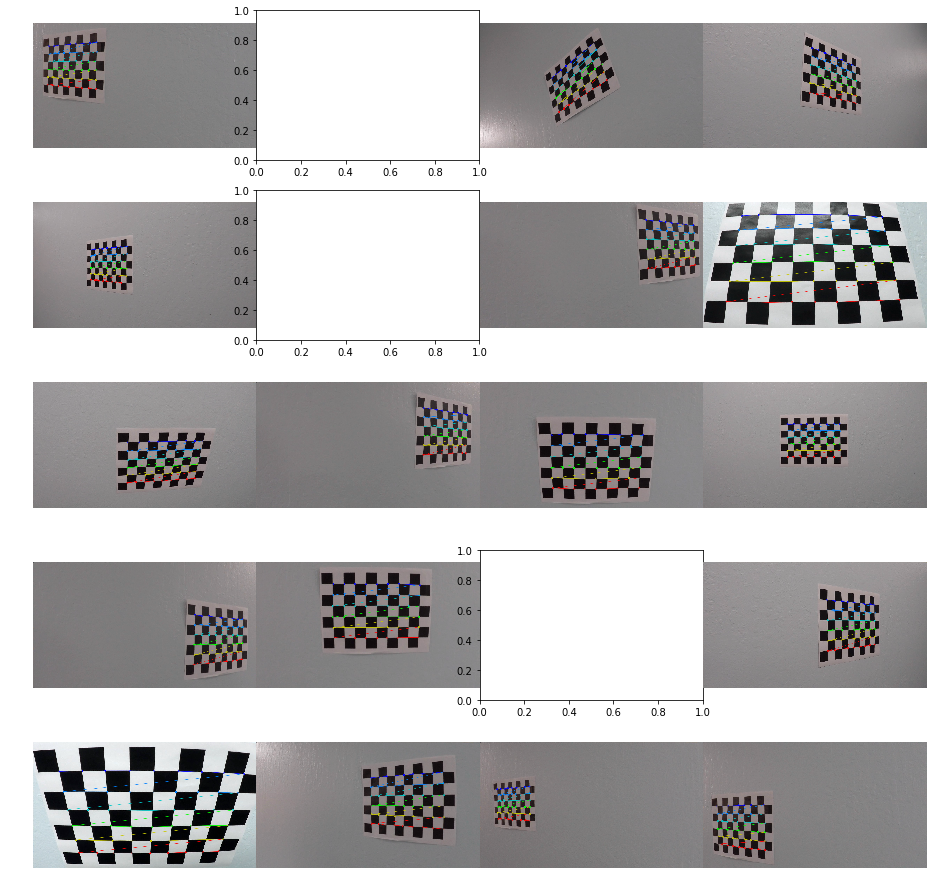

In [53]:
def cameraCalibration(show = False):
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6 * 9, 3), np.float32)
    objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d points in real world space
    imgpoints = []  # 2d points in image plane.

    # Make a list of calibration images
    images = glob.glob('./camera_cal/calibration*.jpg')

    
    fig, axs = plt.subplots(5,4, figsize=(16, 16))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()

    # Step through the list and search for chessboard corners
    for i,filename in enumerate(images):

        img = cv2.imread(filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        patternFound, corners = cv2.findChessboardCorners(gray, (9, 6), None)

        # If found, add object points, image points
        if patternFound is True:
            objpoints.append(objp)
            imgpoints.append(corners)

            if show:
                # Draw and display the corners
                img = cv2.drawChessboardCorners(img, (9, 6), corners, patternFound)
                axs[i].axis('off')
                axs[i].imshow(img)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    return ret, mtx, dist, rvecs, tvecs

ret, mtx, dist, rvecs, tvecs = cameraCalibration(True)

## Image Undistortion

In [60]:
def undistort(image):

    frameUndistorted = cv2.undistort(image, mtx, dist, None, mtx)
    return frameUndistorted

some examples are shown below:

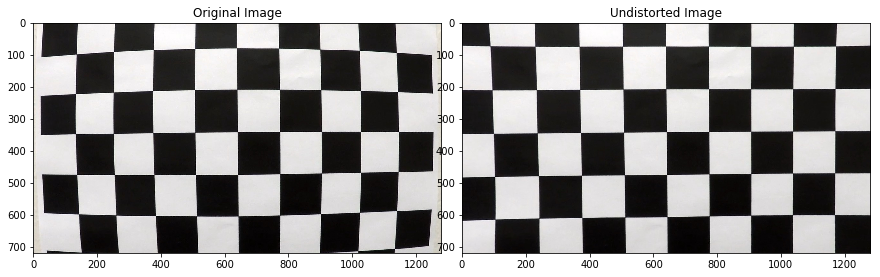

In [61]:
img = cv2.imread('camera_cal/calibration1.jpg')

undistorted = undistort(img)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace = .2, wspace=.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
ax[1].set_title('Undistorted Image')
plt.show()

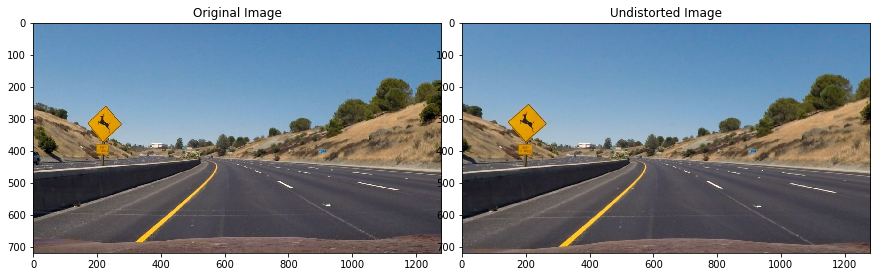

In [64]:
img = cv2.imread('test_images/test2.jpg')

undistorted = undistort(img)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
fig.subplots_adjust(hspace = .2, wspace=.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB))
ax[1].set_title('Undistorted Image')
plt.show()